<a href="https://colab.research.google.com/github/yogeshkaw/house_price_prediction/blob/master/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""House price prediction syatem"""
#acquire knowledge from data using knowledge Discovery Process
# Step 1 -> Data collection and selection

# Read a multi Dimension data from a source in your notebook for analysis 
# Multi D mean : data respresented in rows and columns

# In data, rows are known as observation  and columns are known as variables 

#to read multi D data in python we use pandas lib. Pandas 
#provides a 2D size mutabledata structure known as DataFrame

'House price prediction syatem'

In [0]:
# Read the data and show in a dataframe using pandas
import pandas as pd

In [2]:
# Read the data file from a source
house_data=pd.read_csv('http://hackveda.in/sistec/Housing_Modified.csv')
house_data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [3]:
# Shape
house_data.shape

(546, 12)

In [0]:
# Data Selection

In [6]:
#check the columns
house_data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

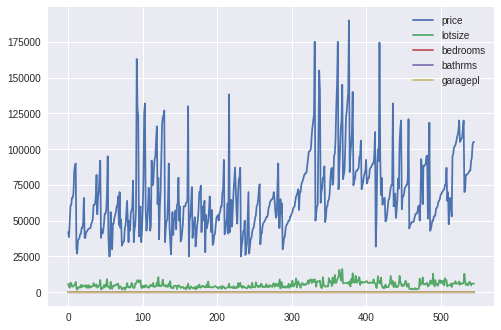

In [7]:
# Plot Graph
house_data.plot()

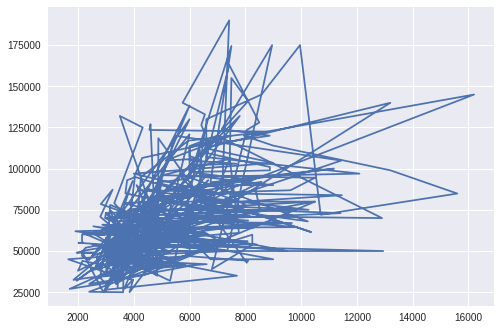

In [8]:
# compare price with lotsize
# Represent lotsize on x_axis. 
#Convert series into array via values keyword 
x=house_data['lotsize'].values
y=house_data['price'].values

# Plot x vs y 
import matplotlib.pyplot as plt
plt.plot(x,y)



In [9]:
# Calculate the correlation b/w price and lotsize
# co relation values from -1 to 1
#  Always consider higly +ive and -ve influences in predection
# above .8 and below -0.8 is consider as highly influencing 
house_data.corr()



,price,lotsize,bedrooms,bathrms,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.178178
garagepl,0.383302,0.352872,0.139117,0.178178,1.000000


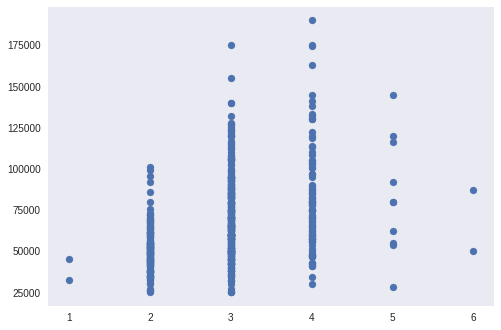

In [10]:
# Plot a scatter graph b/w bedrooms and price
x=house_data['bedrooms'].values
y=house_data['price'].values
plt.scatter(x,y)
plt.grid()

In [0]:
#stage 2 : Data Pre-processing
# 1. Check if data has missing values, If yes replace with mean, median
# or else delete missing values

# 2  Convert text values into number
# a. Label binarizer(Convert binary category to number
# b. Label encoder(Convert n-catogory to no.)


In [0]:
# Check if Data has missing values 
house_data.isnull()

# Replace missing values in dataset
##   house_data.fillna(value=house_data['price'].mean())

# Delete missing values in a dataset
house_data = house_data.dropna()


In [12]:
house_data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [13]:
# Convert text var into no.
# a. Convert binary caegorical to no. using Label Binarizer

# For data pre-processing we have library sklearn.preprocessing
from sklearn.preprocessing import LabelBinarizer

# Create an object of LabelBinarizer
lb=LabelBinarizer()

# Convert binary categorical var into no.
house_data['driveway']=lb.fit_transform(house_data['driveway'])
house_data['recroom']=lb.fit_transform(house_data['recroom'])
house_data['fullbase']=lb.fit_transform(house_data['fullbase'])
house_data['gashw']=lb.fit_transform(house_data['gashw'])
house_data['airco']=lb.fit_transform(house_data['airco'])
house_data['prefarea']=lb.fit_transform(house_data['prefarea'])
house_data.tail()

# b. Convert n-categorical to no. using one Hot encoding



,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,91500.0,4800,3,2,four,1,1,0,0,1,0,0
542,94000.0,6000,3,2,four,1,0,0,0,1,0,0
543,103000.0,6000,3,2,four,1,1,0,0,1,1,0
544,105000.0,6000,3,2,two,1,1,0,0,1,1,0
545,105000.0,6000,3,1,two,1,0,0,0,1,1,0


In [14]:
#corr
house_data.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364


In [15]:
# b2. Convert var into dumy indicator var
df2 = pd.get_dummies(house_data.stories, prefix='stories')

# Display house_data and df2 data
df2.head()

,stories_four,stories_one,stories_three,stories_two
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [0]:
# Concatenate dummy indicator var for stories with house_data  
# Concatenate columns of df2 with coumns of house_data
df = pd.concat([house_data, df2], axis=1,)
# run only one time 

In [17]:
df.shape
df.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0,0,1,0,0


In [0]:
# Delete stories columns from dataframe
del df['stories']
# run only one time 

In [19]:
df.shape
df.head()
df.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,0.372281,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.178354,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,0.145525,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,0.281003,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,0.115453,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,0.067567,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,-0.165285,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.062416,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,0.298887,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.126112,0.016610,-0.079170,-0.041931


In [0]:
#house_data.plot(x=house_data['price'],y=house_data['bedrooms'],kind="scatter")


# compare all 12 independent var with each other for selection purpose
#selction criteria = identify positive or negative influencers



/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


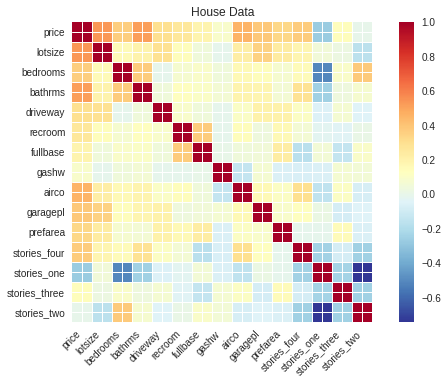

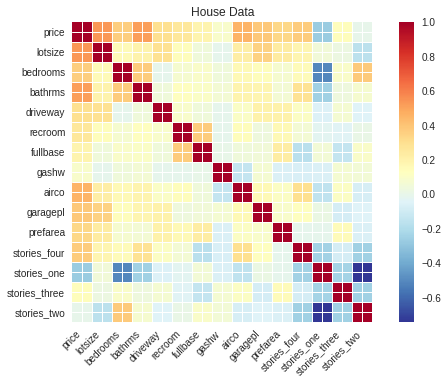

In [20]:
# Create a correlation matrix to identify highly influencing variables

#%matplotlib inline
from statsmodels.api import graphics as sm
sm.plot_corr(df.corr(), xnames=list(df.columns),title='House Data')
#sm.plot_corr(df.corr(), xnames=df.columns,title='House Data')


#import statsmodels.api as sm
#sm.graphics.plot_corr(df.corr(), xnames=list(df.columns))



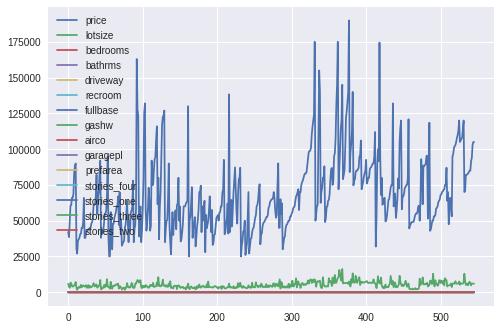

In [21]:
df.plot()

In [22]:
# Stage 4: Data Tranformation 
# a. Standarddization = (StandaedScalar) X-mean / deviation => [-1,1]

# Calculate the mean of var
X=df.price
Xmean=X.mean()
#print(Xmean)

Xstd=X.std()
#print(Xstd)

# standardize the var
scaledX = (X - Xmean) / Xstd
scaledX

# b. Normalization = (MinMaxScaler) X - Xmin / Xmax -Xmin => [0,-1]

# Feature scale the price var
normalizedX = (X - X.min()) / (X.max() - X.min())
normalizedX.head()

0    0.103030
1    0.081818
2    0.148485
3    0.215152
4    0.218182
Name: price, dtype: float64

In [23]:
# Use MinMaxScalar from preprocessing to normalize your dataset
import sklearn.preprocessing as pp
scaler=pp.MinMaxScaler()
print(scaler)
normalizedDF = scaler.fit_transform(df)
normalizedDF


MinMaxScaler(copy=True, feature_range=(0, 1))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.1030303 , 0.28865979, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.08181818, 0.16151203, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.14848485, 0.09690722, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.47272727, 0.29896907, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.48484848, 0.29896907, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.48484848, 0.29896907, 0.4       , ..., 0.        , 0.        ,
        1.        ]])

In [0]:
#pd.DataFrame(normalizedDF).plot()

In [0]:
# objective is to predict house price on the basis of 
# other variables like bedrom...... etc


In [25]:
# Stage 4 : Data Mining
# Since Dependent var is quantitative in nature 
# if dependendent var is quantitative use regrassion
# if dependendent var is categorical use classification 

# Regression can be implemented using Ordinary Least Squares Method
Y = df.price   # dependent var
independent = df.columns
independent = independent.delete(0)
X=df[independent]
X.head()


,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,3060,3,1,1,0,0,0,0,0,0,0,1,0,0
3,6650,3,1,1,1,0,0,0,0,0,0,0,0,1
4,6360,2,1,1,0,0,0,0,0,0,0,1,0,0


In [0]:
import statsmodels.api as sm
ols = sm.OLS(Y,X)
model = ols.fit()

In [27]:
# Interpretation and Evalution
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     84.47
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          4.12e-120
Time:                        05:15:30   Log-Likelihood:                -6033.7
No. Observations:                 546   AIC:                         1.210e+04
Df Residuals:                     532   BIC:                         1.216e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.4853      0.357      9.760      0.000       2.784       4.187
bedrooms       2207.4007   1126.826      1.959      0.051      -6.174    4420.976
bathrms        1.423e+04   1501.004      9.479      0.000    1.13e+04    1.72e+04
driveway       6744.5906   2049.077      3.292      0.001    2719.317    1.08e+04
recroom        4452.7280   1905.476      2.337      0.020     709.547    8195.909
fullbase       5611.2079   1602.026      3.503      0.000    2464.134    8758.281
gashw          1.298e+04   3244.074      4.002      0.000    6610.754    1.94e+04
airco          1.246e+04   1568.474      7.944      0.000    9379.277    1.55e+04
garagepl       4207.8472    847.752      4.964      0.000    2542.495    5873.200
prefarea       9339.4245   1695.216      5.509      0.000    6009.286    1.27e+04
stories_four   2.265e+04   5140.674      4.406      0.000    1.25e+04    3.27e+04
stories_one    2381.0771   3517.544      0.677      0.499   -4528.903    9291.057
stories_three  1.512e+04   4848.135      3.119      0.002    5596.507    2.46e+04
stories_two    7666.2541   4153.290      1.846      0.065    -492.606    1.58e+04
==============================================================================
Omnibus:                       98.599   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.624
Skew:                           0.891   Prob(JB):                     1.27e-58
Kurtosis:                       5.923   Cond. No.                     7.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

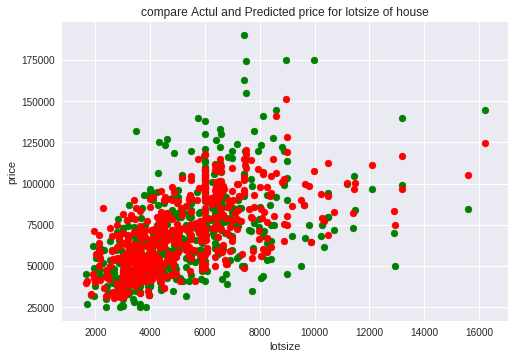

In [28]:
# Interpretation of Model: Ordinary least Squares
Y_pred=model.predict(X)
Y_pred

# Graphically interpret Actual Prices Vs Predicted Prices
df['predicted']=Y_pred
df.head(3)

# Plot the difference b/w actual vs predicted prices
import matplotlib.pyplot as plt
# Make a plot b?w actual, predicted prices vs lotsize
plt.scatter(df['lotsize'],df['price'],color='green')
plt.title('compare Actul and Predicted price for lotsize of house')
plt.ylabel('price')
plt.xlabel('lotsize')
# Plot the predicted price by our OLS regreession eduation
plt.scatter(df['lotsize'],df['predicted'],color='red')